# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [12]:
# Write your code here
from re import I
import nltk
nltk.download('stopwords')
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
!pip install pyLDAvis
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Sample text provided by you
sample_text = [
    'Diana is looking forward to going to her friend’s farmhouse for the weekend',
    'She gets held up at the office, and can’t leave until 6. She’s divorced, and it’s her husband’s weekend with the kids',
    'She doesn’t like being by herself. It’s slow going getting out of the city. When she finally gets her speed up, there’s an incident.'
]

# Remove Emails, new line characters, and distracting single quotes
sample_text = [re.sub('\S*@\S*\s?', '', sent) for sent in sample_text]
sample_text = [re.sub('\s+', ' ', sent) for sent in sample_text]
sample_text = [re.sub("\'", "", sent) for sent in sample_text]

# Print the sample text
pprint(sample_text)

# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = simple_preprocess(text, deacc=True)  # deacc=True removes punctuations
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Preprocess the sample text
processed_text = [preprocess_text(sent) for sent in sample_text]

# Print the preprocessed text
pprint(processed_text)

# Create Dictionary
id2word = corpora.Dictionary(processed_text)

# Create Corpus
texts = processed_text

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
pprint(corpus)

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3,  # Number of topics changed to 3 based on the sample text
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 3 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Diana is looking forward to going to her friend’s farmhouse for the weekend',
 'She gets held up at the office, and can’t leave until 6. She’s divorced, and '
 'it’s her husband’s weekend with the kids',
 'She doesn’t like being by herself. It’s slow going getting out of the city. '
 'When she finally gets her speed up, there’s an incident.']
[['diana', 'looking', 'forward', 'going', 'friend', 'farmhouse', 'weekend'],
 ['gets', 'held', 'office', 'leave', 'divorced', 'husband', 'weekend', 'kids'],
 ['like',
  'slow',
  'going',
  'getting',
  'city',
  'finally',
  'gets',
  'speed',
  'incident']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)],
 [(4, 1),
  (8, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)]]
[(0,
  '0.090*"weekend" + 0.088*"leave" + 0.088*"office" + 0.088*"divorced" + '
  '0.088*"held" + 0.088*"husband" + 0.088*"kids" + 0.088*"gets" + '
  '0.023*"forward

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

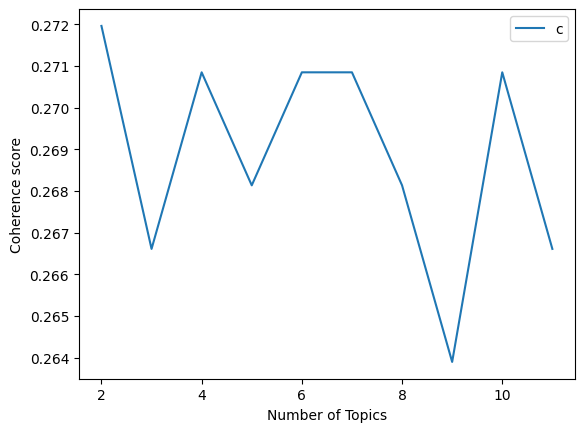

[(0, '-0.609*"get" + -0.298*"go" + -0.230*"citi" + -0.230*"speed" + -0.230*"slow" + -0.230*"like" + -0.230*"incid" + -0.230*"final" + -0.216*"weekend" + -0.148*"offic"'), (1, '-0.367*"weekend" + -0.279*"husband" + -0.279*"held" + -0.279*"offic" + -0.279*"leav" + -0.279*"6" + -0.279*"divorc" + -0.279*"kid" + 0.205*"slow" + 0.205*"like"'), (2, '0.366*"farmhous" + 0.366*"forward" + 0.366*"look" + 0.366*"diana" + 0.366*"friend" + 0.343*"go" + 0.234*"weekend" + -0.178*"get" + -0.132*"husband" + -0.132*"6"')]
Coherence Score: 0.27084750629080506


In [18]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

def preprocess_data(doc_set):
    """
    Input  : document list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our corpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our corpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary, doc_term_matrix

def create_gensim_lsa_model(doc_clean, number_of_topics, words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word=dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    Purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean, start, stop, step):
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix, doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

# Text data
text_data = [
    "Diana is looking forward to going to her friend’s farmhouse for the weekend",
    "She gets held up at the office, and can’t leave until 6. She’s divorced, and it’s her husband’s weekend with the kids",
    "She doesn’t like being by herself. It’s slow going getting out of the city. When she finally gets her speed up, there’s an incident."
]

# Preprocess data
clean_text = preprocess_data(text_data)

# Plot coherence graph
start, stop, step = 2, 12, 1
plot_graph(clean_text, start, stop, step)

# LSA Model
number_of_topics = 7
words = 10
model = create_gensim_lsa_model(clean_text, number_of_topics, words)

dictionary, doc_term_matrix = prepare_corpus(clean_text)
coherence_model = CoherenceModel(model=model, texts=clean_text, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("Coherence Score:", coherence_score)


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Coherence score for K=2: 0.2615372377250359
Coherence score for K=3: 0.259048662622503
Coherence score for K=4: 0.25886919625845384


Coherence score for K=5: 0.26003451106585446


Coherence score for K=6: 0.25940759535060115


Coherence score for K=7: 0.2592469230402293


Coherence score for K=8: 0.2593956183535239


Coherence score for K=9: 0.2585700856517054
Coherence score for K=10: 0.2596085825909674


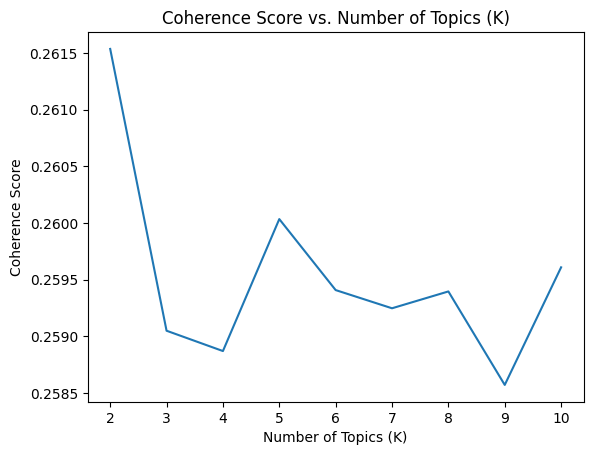

In [56]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

nltk.download('stopwords')
nltk.download('punkt')

# Sample data
sample_data = [
    "Diana is looking forward to going to her friend’s farmhouse for the weekend",
    "She gets held up at the office, and can’t leave until 6. She’s divorced, and it’s her husband’s weekend with the kids",
    "She doesn’t like being by herself. It’s slow going getting out of the city. When she finally gets her speed up, there’s an incident."
]

# Tokenize and preprocess the data
stop_words = set(stopwords.words('english'))

def preprocess(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return words

processed_data = [preprocess(text) for text in sample_data]

# Create a dictionary and a corpus
dictionary = Dictionary(processed_data)
corpus = [dictionary.doc2bow(doc) for doc in processed_data]

# Define a function to calculate coherence score
def calculate_coherence_score(corpus, dictionary, texts, k, alpha, beta):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, alpha=alpha, eta=beta)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Define a range of K values to try
k_values = range(2, 11)

# Initialize lists to store coherence scores
coherence_scores = []

# Hyperparameters for LDA
alpha = 'auto'  # Auto-set the alpha parameter
beta = 'auto'   # Auto-set the beta parameter

# Calculate coherence scores for different values of K
for k in k_values:
    coherence_score = calculate_coherence_score(corpus, dictionary, processed_data, k, alpha, beta)
    coherence_scores.append(coherence_score)
    print(f"Coherence score for K={k}: {coherence_score}")

# Plot the coherence scores
plt.plot(k_values, coherence_scores)
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics (K)')
plt.show()


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [85]:
# Write your code here
%%capture
!pip install bertopic

In [88]:
from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']


In [89]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

2024-03-30 03:40:51,528 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2024-03-30 04:18:54,090 - BERTopic - Embedding - Completed ✓
2024-03-30 04:18:54,092 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 04:19:14,456 - BERTopic - Dimensionality - Completed ✓
2024-03-30 04:19:14,459 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 04:20:10,828 - BERTopic - Cluster - Completed ✓
2024-03-30 04:20:10,841 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 04:20:19,060 - BERTopic - Representation - Completed ✓


In [90]:
# Get the topic information
freq = topic_model.get_topic_info()

# Print the top 5 topics
print(freq.head(5))


   Topic  Count                           Name  \
0     -1   7248               -1_the_to_of_and   
1      0    716        0_he_game_year_baseball   
2      1    609  1_key_clipper_chip_encryption   
3      2    487             2_ites_yep_huh_ken   
4      3    475     3_israel_israeli_jews_arab   

                                      Representation  \
0     [the, to, of, and, is, for, in, it, you, that]   
1  [he, game, year, baseball, hit, players, team,...   
2  [key, clipper, chip, encryption, keys, escrow,...   
3  [ites, yep, huh, ken, forget, why, lets, 15, e...   
4  [israel, israeli, jews, arab, jewish, arabs, p...   

                                 Representative_Docs  
0  [\nFirst off, let me congratulate you for not ...  
1  [\nI am trying to think how to respond to this...  
2  [Here are some corrections and additions to He...  
3                  [Lets not forget , \nHuh?, ites:]  
4  [\nThis a "tried and true" method utilized by ...  


In [91]:
topic_model.get_topic(0)  # Select the most frequent topic

[('he', 0.009010828696155323),
 ('game', 0.008769237722358434),
 ('year', 0.0087333130780182),
 ('baseball', 0.007759968754594691),
 ('hit', 0.007708290291427598),
 ('players', 0.0073129545640486324),
 ('team', 0.007268436664062862),
 ('games', 0.006959352252544825),
 ('his', 0.006740400225185771),
 ('won', 0.006715876957971782)]

In [92]:
topic_model.topics_[:10]

[-1, 8, 58, -1, 123, -1, -1, 9, -1, -1]

In [93]:
topic_model.visualize_topics()

In [94]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [95]:
topic_model.visualize_barchart(top_n_topics=5)

In [96]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [97]:
topic_model.visualize_term_rank()

In [98]:
topic_model.update_topics(docs, n_gram_range=(1, 2))

In [99]:
topic_model.get_topic(0)

[('he', 0.00682914212101612),
 ('year', 0.005674347563549018),
 ('game', 0.005598926402872702),
 ('his', 0.004828289971446003),
 ('hit', 0.004641057361693869),
 ('baseball', 0.004606309846820326),
 ('team', 0.0045507088136597686),
 ('players', 0.004417497885152246),
 ('games', 0.004312228910325609),
 ('won', 0.003966414021759612)]

In [100]:
topic_model.reduce_topics(docs, nr_topics=60)

2024-03-30 04:23:16,200 - BERTopic - Topic reduction - Reducing number of topics
2024-03-30 04:23:44,659 - BERTopic - Topic reduction - Reduced number of topics from 239 to 60


In [101]:
# Access the newly updated topics with:
print(topic_model.topics_)

[-1, 1, 0, -1, 40, -1, -1, 0, -1, -1, 13, -1, -1, 13, 7, 15, -1, 0, 10, 2, 2, 1, 1, 2, -1, 7, -1, -1, -1, -1, -1, 0, 1, 0, 6, 12, -1, 18, -1, 3, 1, 1, 2, -1, 0, -1, -1, -1, 3, -1, 19, 2, 0, 3, 18, 33, -1, -1, -1, 3, 0, -1, -1, 25, -1, 1, 0, -1, -1, -1, -1, 9, 1, 1, -1, -1, -1, 1, 6, 0, 22, 2, 1, 2, 8, 5, -1, 9, -1, 5, 0, 0, 14, 1, 15, 8, -1, -1, 0, -1, 48, 1, -1, 4, 0, 0, -1, -1, -1, -1, 12, -1, 7, 1, 15, 0, -1, 1, 0, -1, -1, 17, -1, -1, -1, -1, -1, 0, -1, -1, 44, 5, -1, 0, 27, 0, 1, 3, -1, 10, -1, 12, 14, 1, 6, 3, 12, 1, 0, -1, 2, 2, -1, -1, 35, -1, -1, 4, 7, 1, 1, 0, -1, -1, -1, -1, 5, 1, 1, 6, 19, -1, 0, -1, 6, -1, 0, -1, 2, -1, 2, 0, 17, -1, -1, 0, -1, -1, 15, -1, -1, -1, 0, 5, 0, 5, 15, -1, -1, 1, 5, -1, -1, -1, -1, 2, 6, -1, 1, 5, -1, 13, -1, 24, 2, 0, -1, 14, -1, 0, -1, 11, -1, 2, 3, -1, 3, 2, 2, 0, -1, -1, -1, 1, 0, -1, -1, 0, 0, 1, 17, 17, 6, -1, -1, 1, 32, -1, 5, 4, 1, 8, 1, 1, -1, 1, 16, -1, -1, -1, 17, 17, 1, -1, 1, -1, 1, -1, -1, 1, 3, -1, 32, 1, 20, -1, 15, -1, 3, 5, 6, 0

In [102]:
similar_topics, similarity = topic_model.find_topics("vehicle", top_n=5); similar_topics

[2, 1, 36, 18, 42]

In [103]:
topic_model.get_topic(22)

[('radar', 0.0361527419478002),
 ('detector', 0.02452181292177679),
 ('detectors', 0.016363769941583672),
 ('radar detector', 0.015856807355163028),
 ('the', 0.014873558391297375),
 ('alarm', 0.013068651189307763),
 ('it', 0.011984937849081905),
 ('is', 0.011806812347989283),
 ('in', 0.011708862229026817),
 ('car', 0.01131520924439522)]

In [104]:
# Save model
topic_model.save("my_model")

2024-03-30 04:24:02,633 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [105]:
# Load model
my_model = BERTopic.load("my_model")

In [106]:
topic_model = BERTopic(embedding_model="xlm-r-bert-base-nli-stsb-mean-tokens")

In [107]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device="cpu")
topic_model = BERTopic(embedding_model=sentence_model, verbose=True)

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here

""""
Evaluating vast amounts of text data, topic modeling emerges as a useful technique for uncovering hidden topics.
Among the methodologies available, Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA) are prominent alternatives.
LDA, in particular, has gained traction, using statistical approaches to extract topic probabilities from data,
whereas LSA uses the Bag of Words model and Singular Value Decomposition to discover latent topic.

Topic coherence is an important factor in determining the efficiency of topic modeling algorithms since it assesses the meaningfulness of the selected subjects by evaluating word similarities.
A greater coherence score suggests improved performance. For example, an LDA coherence score of 0.25 indicates great performance. However, recent models, such as BERTopic,
provide exciting options by combining transformer models and class-based TF-IDF.
These models frequently give bigger vocabularies and better interpretability than previous techniques.
They excel in capturing semantic relationships and producing more cohesive and interpretable topics, indicating a possible option for advanced text analysis tasks.
In fact, both LDA and LSA need careful consideration of parameters such as the number of topics (k),
which has a substantial impact on the quality of the resultant topic models. Choosing an acceptable number for k, which is frequently evaluated via topic coherence analysis,
is critical for creating meaningful and interpretable topics.

While LDA typically beats LSA in terms of topic modeling, the decision between the two is based on aspects such as dataset features and modeling.
LSA is useful for noise and dimension reduction, making it ideal for dealing with huge datasets effectively.
On the other hand, LDA is recommended when topic interpretability is critical since it assigns probability distributions across words to each subject,
making thematic content easier to grasp.

Overall, the efficiency of topic modeling algorithms is determined by a variety of characteristics,
including performance, interpretability, scalability, and job fit.
Evaluating these parameters in light of the dataset and objectives. BERTopic is best for the topic modeling from the four topics.


""""""

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
In this assignment, I learned about topic modulation, particularly utilizing BERTopic.
I found BERTopic intriguing, although running it proved to be time-consuming.
Engaging in such exercises undoubtedly enhances one's coding skills and expands knowledge.
However, the primary challenge I encountered was in the third part, as the necessary libraries were not readily available





'''